In [1]:
import pandas as pd

In [53]:
import sklearn

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn import svm

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
from sklearn.neural_network import MLPClassifier

In [75]:
import tensorflow as tf

In [77]:
from tensorflow.keras.models import Sequential

In [78]:
from tensorflow.keras.layers import Dense

In [63]:
df = pd.read_csv('fraud_train.csv')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,card_no
0,3.091847,1.532477,1.717581,1.0,0.0,0.0,0.0,0,30020
1,5.650517,3.026613,4.092868,1.0,0.0,0.0,1.0,1,78725
2,40.349809,6.638186,1.290949,1.0,1.0,0.0,1.0,0,35631
3,6.844254,4.673873,0.413126,1.0,1.0,0.0,1.0,0,96397
4,5.992280,0.090814,4.325565,1.0,0.0,1.0,1.0,0,49230


# Data Analysis

Try to find patterns in data


In [ ]:
df['fraud'].unique()

array([0, 1], dtype=int64)

<Axes: >

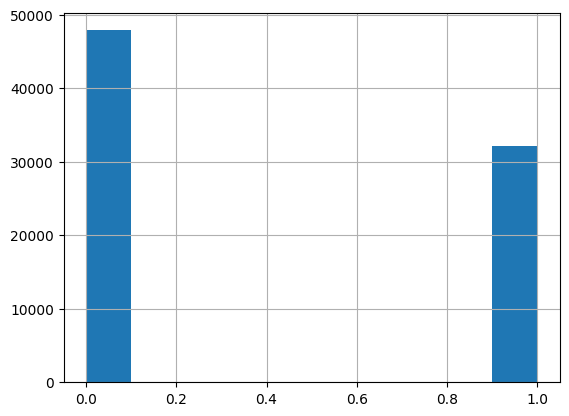

In [64]:
df['fraud'].hist()

We can see that more of the transactions were legitimate than were fraudulent.

<Axes: >

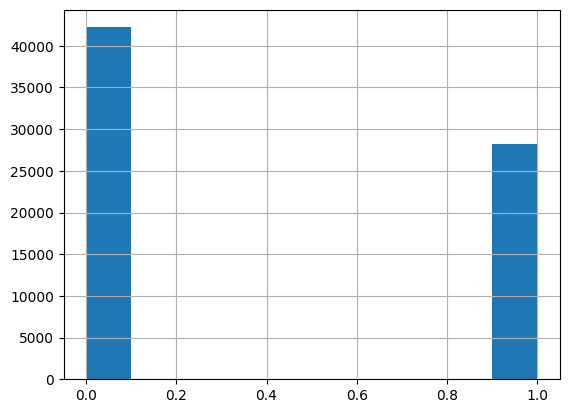

In [65]:
df['fraud'][df['repeat_retailer']==1].hist()


A large number of transactions taking place at repeat retailers were fraudulent

<Axes: >

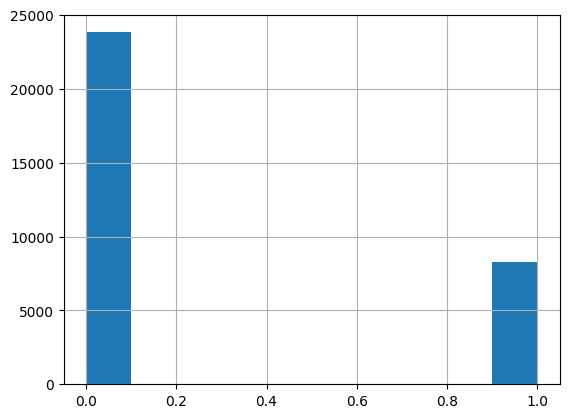

In [ ]:
df['used_chip'][df['fraud']==1].hist()

<Axes: >

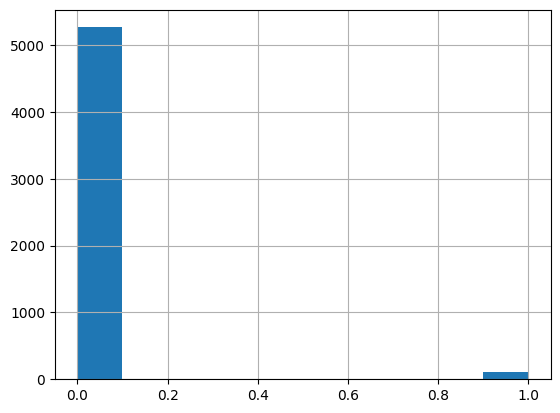

In [66]:
df['fraud'][df['used_pin_number']==1].hist()

# Checking for Null Values

In [68]:
df.isnull().values.any()

False

# Feature Engineering

In [67]:
# Aims to provide relevant raw fraud train data in the machine to improve on the machine learning model

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              80000 non-null  float64
 1   distance_from_last_transaction  80000 non-null  float64
 2   ratio_to_median_purchase_price  80000 non-null  float64
 3   repeat_retailer                 80000 non-null  float64
 4   used_chip                       80000 non-null  float64
 5   used_pin_number                 80000 non-null  float64
 6   online_order                    80000 non-null  float64
 7   fraud                           80000 non-null  int64  
 8   card_no                         80000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 5.5 MB


In [69]:
X = df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order', 'card_no']].values
y = df[['fraud']].values

In [9]:
X.shape

(80000, 8)

In [10]:
y.shape

(80000, 1)

In [12]:
X

array([[3.09184677e+00, 1.53247730e+00, 1.71758078e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.00200000e+04],
       [5.65051696e+00, 3.02661300e+00, 4.09286776e+00, ...,
        0.00000000e+00, 1.00000000e+00, 7.87250000e+04],
       [4.03498091e+01, 6.63818645e+00, 1.29094909e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.56310000e+04],
       ...,
       [2.17813969e+00, 1.39281505e+00, 6.13469125e+00, ...,
        0.00000000e+00, 1.00000000e+00, 6.65700000e+03],
       [2.56898185e+01, 4.90976824e-01, 6.92979704e+00, ...,
        0.00000000e+00, 1.00000000e+00, 5.63810000e+04],
       [1.09751886e+01, 3.87483799e+01, 3.98337078e+00, ...,
        0.00000000e+00, 1.00000000e+00, 9.67560000e+04]])

In [71]:
df['card_no'].median()

50168.5

In [72]:
len(df)

80000

# Normalize

In [14]:
sc = StandardScaler()

In [15]:
X = sc.fit_transform(X)

In [16]:
X

array([[-0.36073415, -0.1922989 , -0.34155142, ..., -0.26837809,
        -1.73130058, -0.6958692 ],
       [-0.33613008, -0.14466279,  0.17848452, ..., -0.26837809,
         0.57760045,  0.9933328 ],
       [-0.00246312, -0.02951842, -0.43495647, ..., -0.26837809,
         0.57760045, -0.50126675],
       ...,
       [-0.36952032, -0.19675162,  0.62551328, ..., -0.26837809,
         0.57760045, -1.50615205],
       [-0.14343299, -0.22550408,  0.7995906 , ..., -0.26837809,
         0.57760045,  0.21839123],
       [-0.28492826,  0.99422044,  0.15451168, ..., -0.26837809,
         0.57760045,  1.61868957]])

In [17]:
y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

# Train/Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape

((64000, 8), (16000, 8))

# Model Selection

## Logistic Regression

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
model.score(X_test, y_test)

0.9385

## SVM

In [26]:
svm_model = svm.SVC()

In [27]:
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
svm_model.score(X_test, y_test)

0.9859375

## KNN

In [30]:
knn_model = KNeighborsClassifier()

In [31]:
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [32]:
knn_model.score(X_test, y_test)

0.9903125

## Random Forest

In [34]:
rf_model = RandomForestClassifier()

In [35]:
rf_model.fit(X_train, y_train)

<ipython-input-35-ce45b449cc1f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [36]:
rf_model.score(X_test, y_test)

1.0

## MLP (Multi Layer Perceptron)

In [38]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50))

In [39]:
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(50, 50))

In [40]:
mlp_model.score(X_test, y_test)

0.9970625

# Create Predictions

In [41]:
df_test = pd.read_csv('fraud_test.csv')

In [42]:
df_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,card_no
0,0.322477,0.750535,1.216245,0.0,1.0,1.0,1.0,14487
1,2.930222,0.010856,0.351132,1.0,0.0,0.0,0.0,16733
2,10.918088,0.407638,35.296636,1.0,0.0,0.0,1.0,90819
3,27.824534,1.917857,7.977137,1.0,0.0,0.0,1.0,38793
4,8.852025,16.931587,0.230846,1.0,0.0,0.0,0.0,19484


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              20000 non-null  float64
 1   distance_from_last_transaction  20000 non-null  float64
 2   ratio_to_median_purchase_price  20000 non-null  float64
 3   repeat_retailer                 20000 non-null  float64
 4   used_chip                       20000 non-null  float64
 5   used_pin_number                 20000 non-null  float64
 6   online_order                    20000 non-null  float64
 7   card_no                         20000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [44]:
X_new = df_test[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order', 'card_no']].values

In [45]:
X_new = sc.transform(X_new)

In [46]:
X_new

array([[-0.38736429, -0.21722884, -0.4513119 , ...,  3.72608654,
         0.57760045, -1.23458955],
       [-0.36228833, -0.2408113 , -0.64071631, ..., -0.26837809,
        -1.73130058, -1.15669308],
       [-0.28547734, -0.2281611 ,  7.01011424, ..., -0.26837809,
         0.57760045,  1.41278068],
       ...,
       [-0.16147826, -0.16645996, -0.57171732, ..., -0.26837809,
         0.57760045,  0.22584792],
       [-0.37319566, -0.23801883, -0.64233776, ..., -0.26837809,
         0.57760045,  0.76762032],
       [-0.09601247, -0.23673145, -0.56983949, ..., -0.26837809,
         0.57760045, -0.4535092 ]])

In [47]:
y_pred = mlp_model.predict(X_new)

In [48]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
df_submission = {'card_no': df_test['card_no'], 'fraud': y_pred}
df_submission = pd.DataFrame(data=df_submission)

In [50]:
df_submission.head()

,card_no,fraud
0,14487,0
1,16733,0
2,90819,1
3,38793,1
4,19484,0


In [52]:
df_submission.to_csv('620130627-submission.csv', index=False)